#Importing Depandencies

In [ ]:
!pip install pyarabic


In [ ]:
!pip install faiss-gpu

import faiss

In [ ]:
!pip install sentence-transformers


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install Arabic-Stopwords
!pip install qalsadi

In [ ]:
import pyarabic.araby as araby


In [ ]:
!pip install transformers

In [ ]:
!pip install clusteval

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import tensorflow as tf
import transformers
import torch

# Data Preprocessing

In [ ]:
#Uploading data
df=pd.read_csv("quran.csv",header = None, names=['text'])
df.head()

,text
0,1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1|2|الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1|3|الرَّحْمَٰنِ الرَّحِيمِ
3,1|4|مَالِكِ يَوْمِ الدِّينِ
4,1|5|إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


In [ ]:
#Splitting aya text from aya number and surah number
df = df['text'].str.split('|', expand=True)
df.columns = ['surah_num', 'ayah_num', 'ayah_txt']
df['surah_num'] = df['surah_num'].astype('int')
df['ayah_num'] = df['ayah_num'].astype('int')

In [ ]:
df.head()

,surah_num,ayah_num,ayah_txt
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


In [ ]:
def get_surah_names():
    # Initialize an empty list to store the names of the Surahs
    surah_names = []
    # The URL of the website from which we want to scrape the Surah names
    URL = "https://surahquran.com/quran-search/quran.html"
    # Send a request to fetch the content of the URL
    page = requests.get(URL)
    # Parse the content of the page using BeautifulSoup with the HTML parser
    soup = BeautifulSoup(page.content, "html.parser")
    # Find the second table on the page that contains the Surah names
    all_table = soup.find_all('table')[1]
    # Iterate over each anchor (<a>) element in the table
    for elm in all_table.find_all("a"):
        # Append the text of the anchor element (which is the Surah name) to the surah_names list
        surah_names.append(elm.text)
    # Return the list of Surah names
    return surah_names


In [ ]:
quran_surah_names = get_surah_names()
quran_surah_names

['الفاتحة',
 'البقرة',
 'آل عمران',
 'النساء',
 'المائدة',
 'الأنعام',
 'الأعراف',
 'الأنفال',
 'التوبة',
 'يونس',
 'هود',
 'يوسف',
 'الرعد',
 'إبراهيم',
 'الحجر',
 'النحل',
 'الإسراء',
 'الكهف',
 'مريم',
 'طه',
 'الأنبياء',
 'الحج',
 'المؤمنون',
 'النور',
 'الفرقان',
 'الشعراء',
 'النمل',
 'القصص',
 'العنكبوت',
 'الروم',
 'لقمان',
 'السجدة',
 'الأحزاب',
 'سبأ',
 'فاطر',
 'يس',
 'الصافات',
 'ص',
 'الزمر',
 'غافر',
 'فصلت',
 'الشورى',
 'الزخرف',
 'الدخان',
 'الجاثية',
 'الأحقاف',
 'محمد',
 'الفتح',
 'الحجرات',
 'ق',
 'الذاريات',
 'الطور',
 'النجم',
 'القمر',
 'الرحمن',
 'الواقعة',
 'الحديد',
 'المجادلة',
 'الحشر',
 'الممتحنة',
 'الصف',
 'الجمعة',
 'المنافقون',
 'التغابن',
 'الطلاق',
 'التحريم',
 'الملك',
 'القلم',
 'الحاقة',
 'المعارج',
 'نوح',
 'الجن',
 'المزمل',
 'المدثر',
 'القيامة',
 'الإنسان',
 'المرسلات',
 'النبأ',
 'النازعات',
 'عبس',
 'التكوير',
 'الإنفطار',
 'المطففين',
 'الانشقاق',
 'البروج',
 'الطارق',
 'الأعلى',
 'الغاشية',
 'الفجر',
 'البلد',
 'الشمس',
 'الليل',
 'الضحى',
 

In [ ]:
# Adding surah name to data
df['surah_name'] = df['surah_num'].apply(lambda x: quran_surah_names[x-1])

In [ ]:
df.head(20)

,surah_num,ayah_num,ayah_txt,surah_name
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,الفاتحة
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,الفاتحة
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ,الفاتحة
3,1,4,مَالِكِ يَوْمِ الدِّينِ,الفاتحة
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,الفاتحة
5,1,6,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ,الفاتحة
6,1,7,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ...,الفاتحة
7,2,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم,البقرة
8,2,2,ذَٰلِكَ الْكِتَابُ لَا رَيْبَ ۛ فِيهِ ۛ هُدًى ...,البقرة
9,2,3,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ...,البقرة


In [ ]:
#The holy Quran has 114 surah and 6236 ayah
df.describe()

,surah_num,ayah_num
count,6236.000000,6236.000000
mean,33.519724,53.506575
std,26.461261,50.463924
min,1.000000,1.000000
25%,11.000000,16.000000
50%,26.000000,38.000000
75%,51.000000,75.000000
max,114.000000,286.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   surah_num   6236 non-null   int64 
 1   ayah_num    6236 non-null   int64 
 2   ayah_txt    6236 non-null   object
 3   surah_name  6236 non-null   object
dtypes: int64(2), object(2)
memory usage: 195.0+ KB


In [ ]:
import unicodedata

def remove_diacritics(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

In [ ]:
df['ayah_txt_clean'] = df['ayah_txt'].apply(remove_diacritics)

In [ ]:
df.head()

,surah_num,ayah_num,ayah_txt,surah_name,ayah_txt_clean
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,الفاتحة,بسم الله الرحمن الرحيم
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,الفاتحة,الحمد لله رب العالمين
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ,الفاتحة,الرحمن الرحيم
3,1,4,مَالِكِ يَوْمِ الدِّينِ,الفاتحة,مالك يوم الدين
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,الفاتحة,اياك نعبد واياك نستعين


# Visualize the count of every Ayah in each Surah

In [ ]:
import pandas as pd
import plotly.express as px

# Group by surah_name and count the number of Ayahs
surah_counts = df.groupby('surah_name').size().reset_index(name='ayah_count')

# Create a bar plot using Plotly
fig = px.bar(surah_counts,
             x='surah_name',
             y='ayah_count',
             title='Number of Ayahs in Each Surah',
             labels={'surah_name':'Surah Name', 'ayah_count':'Count of Ayahs'},
             height=600)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

# Show the plot
fig.show()


# Embedding with ARABERT

In [ ]:
#imoprting Arabert model and tokenizer
from transformers import AutoTokenizer, AutoModel
model_name = "aubmindlab/bert-base-arabert"
model = AutoModel.from_pretrained(model_name).to('cuda')
tokenizer = AutoTokenizer.from_pretrained(model_name)

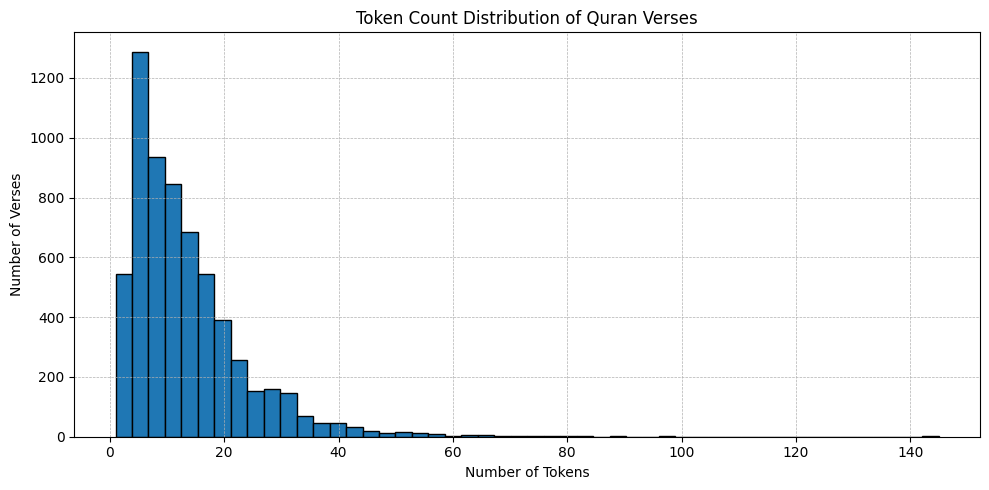

Average tokens per verse: 13.25
Maximum tokens in a verse: 145
Minimum tokens in a verse: 1


In [ ]:
import matplotlib.pyplot as plt


# Tokenize each verse and get token counts
token_counts = [len(tokenizer.tokenize(verse)) for verse in df['ayah_txt'].tolist()]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(token_counts, bins=50, edgecolor='k')
plt.title('Token Count Distribution of Quran Verses')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Verses')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Additionally, you can print out some basic statistics
print(f"Average tokens per verse: {np.mean(token_counts):.2f}")
print(f"Maximum tokens in a verse: {np.max(token_counts)}")
print(f"Minimum tokens in a verse: {np.min(token_counts)}")


In [ ]:
verses = df['ayah_txt'].tolist()

In [ ]:
def batch_embed_texts(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i: i + batch_size]
        tokens = tokenizer(batch, return_tensors="pt", padding='max_length', truncation=True, max_length=160)# Ensure tensors are on GPU
        tokens = {k: v.to('cuda') for k, v in tokens.items()}
        with torch.no_grad():
            batch_embeddings = model(**tokens).last_hidden_state.mean(dim=1)
            embeddings.extend(batch_embeddings.cpu().numpy())  # Move embeddings to CPU and convert to numpy
    return np.array(embeddings)


In [ ]:
embeddings = batch_embed_texts(verses)

In [ ]:
embeddings.shape

(6236, 768)

In [ ]:
from sklearn.preprocessing import normalize

# Normalize embeddings
embeddings_normalized = normalize(embeddings, norm='l2', axis=1)


In [ ]:
import faiss

# Dimension of embeddings
d = embeddings_normalized.shape[1]

# Create the FAISS index
index = faiss.IndexFlatIP(d)

# If you want to use GPU:
gpu_index = faiss.index_cpu_to_all_gpus(index)

# Add normalized embeddings to the index
gpu_index.add(embeddings_normalized)


In [ ]:
def search_quran(query, top_k=20):
    # Convert user query to an AraBERT embedding and normalize it
    query_embedding = batch_embed_texts(query)
    query_embedding_normalized = normalize(query_embedding, norm='l2', axis=1)

    # Search the FAISS index
    scores, indices = gpu_index.search(query_embedding_normalized, top_k)

    # Retrieve and format the most similar verses
    formatted_results = []
    for idx in indices[0]:
        row = df.iloc[idx]
        ayah_info = f"{row['surah_name']} {row['ayah_num']}: {row['ayah_txt']}"
        formatted_results.append(ayah_info)

    return formatted_results

# Example:
query = "الصلاة هي أحد الأركان الخمسة للإسلام، وهي عبادة مهمة تجسد العلاقة بين المسلم وربه"
results = search_quran(query)
for res in results:
    print(res)
    print("====================================")

البقرة 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
العنكبوت 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
لقمان 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
آل عمران 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
السجدة 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
الروم 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
مريم 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ كهيعص
الأعراف 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ المص
الشورى 2: عسق
الشعراء 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ طسم
القصص 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ طسم
يوسف 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الر ۚ تِلْكَ آيَاتُ الْكِتَابِ الْمُبِينِ
يونس 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الر ۚ تِلْكَ آيَاتُ الْكِتَابِ الْحَكِيمِ
الحجر 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الر ۚ تِلْكَ آيَاتُ الْكِتَابِ وَقُرْآنٍ مُبِينٍ
ق 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ ق ۚ وَالْقُرْآنِ الْمَجِيدِ
الرعد 1: بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ المر ۚ تِلْكَ آيَاتُ الْكِتَابِ ۗ وَالَّذِي أُنْزِلَ إِلَ

#Sentece-Bert

In [ ]:
from sentence_transformers import SentenceTransformer
# Load the multilingual model; you can experiment with different models
model = SentenceTransformer('distiluse-base-multilingual-cased')

# Get embeddings for all verses
embeddings = model.encode(df['ayah_txt'].tolist(), convert_to_numpy=True)
embeddings_normalized = normalize(embeddings, norm='l2', axis=1)

[clusteval] >INFO> Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
[clusteval] >INFO> Use pytorch device: cuda


Batches:   0%|          | 0/195 [00:00<?, ?it/s]

In [ ]:
import faiss

# Dimension of embeddings
d = embeddings_normalized.shape[1]

# Create the FAISS index
index = faiss.IndexFlatIP(d)

# If you want to use GPU:
gpu_index = faiss.index_cpu_to_all_gpus(index)

# Add normalized embeddings to the index
gpu_index.add(embeddings_normalized)


In [ ]:
def search_quran(query, top_k=20):
    # Convert user query to a SentenceBERT embedding and normalize it
    query_embedding = model.encode(query).reshape(1, -1)  # Reshape to ensure it's a 2D array
    query_embedding_normalized = normalize(query_embedding, norm='l2', axis=1)

    # Search the FAISS index
    scores, indices = gpu_index.search(query_embedding_normalized, top_k)

    # Retrieve and format the most similar verses
    formatted_results = []
    for idx in indices[0]:
        row = df.iloc[idx]
        ayah_info = f"{row['surah_name']} {row['ayah_num']}: {row['ayah_txt']}"
        formatted_results.append(ayah_info)

    return formatted_results

# Example:
query = "الصلاة هي أحد الأركان الخمسة للإسلام، وهي عبادة مهمة تجسد العلاقة بين المسلم وربه"
results = search_quran(query)
for res in results:
    print(res)
    print("====================================")



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

الزخرف 84: وَهُوَ الَّذِي فِي السَّمَاءِ إِلَٰهٌ وَفِي الْأَرْضِ إِلَٰهٌ ۚ وَهُوَ الْحَكِيمُ الْعَلِيمُ
النور 18: وَيُبَيِّنُ اللَّهُ لَكُمُ الْآيَاتِ ۚ وَاللَّهُ عَلِيمٌ حَكِيمٌ
الأعراف 67: قَالَ يَا قَوْمِ لَيْسَ بِي سَفَاهَةٌ وَلَٰكِنِّي رَسُولٌ مِنْ رَبِّ الْعَالَمِينَ
مريم 51: وَاذْكُرْ فِي الْكِتَابِ مُوسَىٰ ۚ إِنَّهُ كَانَ مُخْلَصًا وَكَانَ رَسُولًا نَبِيًّا
الملك 22: أَفَمَنْ يَمْشِي مُكِبًّا عَلَىٰ وَجْهِهِ أَهْدَىٰ أَمَّنْ يَمْشِي سَوِيًّا عَلَىٰ صِرَاطٍ مُسْتَقِيمٍ
التغابن 11: مَا أَصَابَ مِنْ مُصِيبَةٍ إِلَّا بِإِذْنِ اللَّهِ ۗ وَمَنْ يُؤْمِنْ بِاللَّهِ يَهْدِ قَلْبَهُ ۚ وَاللَّهُ بِكُلِّ شَيْءٍ عَلِيمٌ
الأحزاب 3: وَتَوَكَّلْ عَلَى اللَّهِ ۚ وَكَفَىٰ بِاللَّهِ وَكِيلًا
العلق 10: عَبْدًا إِذَا صَلَّىٰ
آل عمران 76: بَلَىٰ مَنْ أَوْفَىٰ بِعَهْدِهِ وَاتَّقَىٰ فَإِنَّ اللَّهَ يُحِبُّ الْمُتَّقِينَ
الأعراف 159: وَمِنْ قَوْمِ مُوسَىٰ أُمَّةٌ يَهْدُونَ بِالْحَقِّ وَبِهِ يَعْدِلُونَ
النمل 9: يَا مُوسَىٰ إِنَّهُ أَنَا اللَّهُ الْعَزِيزُ الْحَكِيمُ
الحجرات 8: فَضْلًا مِنَ اللَّهِ وَنِ

In [ ]:
# Example:
query = "تارك الصلاة"
results = search_quran(query)
for res in results:
    print(res)
    print("====================================")

العلق 10: عَبْدًا إِذَا صَلَّىٰ
الحاقة 31: ثُمَّ الْجَحِيمَ صَلُّوهُ
الناس 3: إِلَٰهِ النَّاسِ
المعارج 16: نَزَّاعَةً لِلشَّوَىٰ
الهمزة 6: نَارُ اللَّهِ الْمُوقَدَةُ
المدثر 36: نَذِيرًا لِلْبَشَرِ
النجم 6: ذُو مِرَّةٍ فَاسْتَوَىٰ
الإخلاص 2: اللَّهُ الصَّمَدُ
الليل 6: وَصَدَّقَ بِالْحُسْنَىٰ
المرسلات 22: إِلَىٰ قَدَرٍ مَعْلُومٍ
الغاشية 4: تَصْلَىٰ نَارًا حَامِيَةً
التكاثر 6: لَتَرَوُنَّ الْجَحِيمَ
النبأ 2: عَنِ النَّبَإِ الْعَظِيمِ
التكوير 16: الْجَوَارِ الْكُنَّسِ
الواقعة 15: عَلَىٰ سُرُرٍ مَوْضُونَةٍ
الأعلى 2: الَّذِي خَلَقَ فَسَوَّىٰ
المدثر 13: وَبَنِينَ شُهُودًا
البروج 5: النَّارِ ذَاتِ الْوَقُودِ
الناس 2: مَلِكِ النَّاسِ
عبس 20: ثُمَّ السَّبِيلَ يَسَّرَهُ


#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df["ayah_txt_clean"]
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
corpus_vectorized = vectorizer.fit_transform(corpus)
print(corpus_vectorized.shape)

(6236, 58494)


In [ ]:
def show_best_results(df, scores_array, top_n=20):
    sorted_indices = scores_array.argsort()[::-1]
    for position, idx in enumerate(sorted_indices[:top_n]):
        row = df.iloc[idx]
        ayah = row["ayah_txt"]
        ayah_num = row["ayah_num"]
        surah_name = row["surah_name"]
        score = scores_array[idx]
        if score > 0:
            print(ayah)
            print(f'أيه رقم {ayah_num}  سورة {surah_name}')
            print("====================================")

In [ ]:
def run_tfidf(query):
    query_vectorized = vectorizer.transform([query])
    scores = query_vectorized.dot(corpus_vectorized.transpose())
    scores_array = scores.toarray()[0]
    show_best_results(df, scores_array)

In [ ]:
query = "الصلاة هي أحد الأركان الخمسة للإسلام، وهي عبادة مهمة تجسد العلاقة بين المسلم وربه"
run_tfidf(query)

فَإِذَا قَضَيْتُمُ الصَّلَاةَ فَاذْكُرُوا اللَّهَ قِيَامًا وَقُعُودًا وَعَلَىٰ جُنُوبِكُمْ ۚ فَإِذَا اطْمَأْنَنْتُمْ فَأَقِيمُوا الصَّلَاةَ ۚ إِنَّ الصَّلَاةَ كَانَتْ عَلَى الْمُؤْمِنِينَ كِتَابًا مَوْقُوتًا
أيه رقم 103  سورة النساء
فَإِنَّ الْجَنَّةَ هِيَ الْمَأْوَىٰ
أيه رقم 41  سورة النازعات
إِذَا أُلْقُوا فِيهَا سَمِعُوا لَهَا شَهِيقًا وَهِيَ تَفُورُ
أيه رقم 7  سورة الملك
فَإِنَّ الْجَحِيمَ هِيَ الْمَأْوَىٰ
أيه رقم 39  سورة النازعات
فَإِنَّمَا هِيَ زَجْرَةٌ وَاحِدَةٌ
أيه رقم 13  سورة النازعات
وَكَأَيِّنْ مِنْ قَرْيَةٍ أَمْلَيْتُ لَهَا وَهِيَ ظَالِمَةٌ ثُمَّ أَخَذْتُهَا وَإِلَيَّ الْمَصِيرُ
أيه رقم 48  سورة الحج
وَضَرَبَ لَنَا مَثَلًا وَنَسِيَ خَلْقَهُ ۖ قَالَ مَنْ يُحْيِي الْعِظَامَ وَهِيَ رَمِيمٌ
أيه رقم 78  سورة يس
سَلَامٌ هِيَ حَتَّىٰ مَطْلَعِ الْفَجْرِ
أيه رقم 5  سورة القدر
فَأَلْقَاهَا فَإِذَا هِيَ حَيَّةٌ تَسْعَىٰ
أيه رقم 20  سورة طه
وَكَذَٰلِكَ أَخْذُ رَبِّكَ إِذَا أَخَذَ الْقُرَىٰ وَهِيَ ظَالِمَةٌ ۚ إِنَّ أَخْذَهُ أَلِيمٌ شَدِيدٌ
أيه رقم 102  سورة هود
الَّذِينَ يُقِيمُونَ ال

In [ ]:
query = "الصلاة"
run_tfidf(query)

فَإِذَا قَضَيْتُمُ الصَّلَاةَ فَاذْكُرُوا اللَّهَ قِيَامًا وَقُعُودًا وَعَلَىٰ جُنُوبِكُمْ ۚ فَإِذَا اطْمَأْنَنْتُمْ فَأَقِيمُوا الصَّلَاةَ ۚ إِنَّ الصَّلَاةَ كَانَتْ عَلَى الْمُؤْمِنِينَ كِتَابًا مَوْقُوتًا
أيه رقم 103  سورة النساء
الَّذِينَ يُقِيمُونَ الصَّلَاةَ وَمِمَّا رَزَقْنَاهُمْ يُنْفِقُونَ
أيه رقم 3  سورة الأنفال
اتْلُ مَا أُوحِيَ إِلَيْكَ مِنَ الْكِتَابِ وَأَقِمِ الصَّلَاةَ ۖ إِنَّ الصَّلَاةَ تَنْهَىٰ عَنِ الْفَحْشَاءِ وَالْمُنْكَرِ ۗ وَلَذِكْرُ اللَّهِ أَكْبَرُ ۗ وَاللَّهُ يَعْلَمُ مَا تَصْنَعُونَ
أيه رقم 45  سورة العنكبوت
وَأَقِيمُوا الصَّلَاةَ وَآتُوا الزَّكَاةَ وَارْكَعُوا مَعَ الرَّاكِعِينَ
أيه رقم 43  سورة البقرة
وَأَقِيمُوا الصَّلَاةَ وَآتُوا الزَّكَاةَ وَأَطِيعُوا الرَّسُولَ لَعَلَّكُمْ تُرْحَمُونَ
أيه رقم 56  سورة النور
وَأَنْ أَقِيمُوا الصَّلَاةَ وَاتَّقُوهُ ۚ وَهُوَ الَّذِي إِلَيْهِ تُحْشَرُونَ
أيه رقم 72  سورة الأنعام
الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ الصَّلَاةَ وَمِمَّا رَزَقْنَاهُمْ يُنْفِقُونَ
أيه رقم 3  سورة البقرة
الَّذِينَ يُقِيمُونَ الصَّلَاةَ 

In [ ]:
query = "توبة"
run_tfidf(query)

يَا أَيُّهَا الَّذِينَ آمَنُوا تُوبُوا إِلَى اللَّهِ تَوْبَةً نَصُوحًا عَسَىٰ رَبُّكُمْ أَنْ يُكَفِّرَ عَنْكُمْ سَيِّئَاتِكُمْ وَيُدْخِلَكُمْ جَنَّاتٍ تَجْرِي مِنْ تَحْتِهَا الْأَنْهَارُ يَوْمَ لَا يُخْزِي اللَّهُ النَّبِيَّ وَالَّذِينَ آمَنُوا مَعَهُ ۖ نُورُهُمْ يَسْعَىٰ بَيْنَ أَيْدِيهِمْ وَبِأَيْمَانِهِمْ يَقُولُونَ رَبَّنَا أَتْمِمْ لَنَا نُورَنَا وَاغْفِرْ لَنَا ۖ إِنَّكَ عَلَىٰ كُلِّ شَيْءٍ قَدِيرٌ
أيه رقم 8  سورة التحريم
وَمَا كَانَ لِمُؤْمِنٍ أَنْ يَقْتُلَ مُؤْمِنًا إِلَّا خَطَأً ۚ وَمَنْ قَتَلَ مُؤْمِنًا خَطَأً فَتَحْرِيرُ رَقَبَةٍ مُؤْمِنَةٍ وَدِيَةٌ مُسَلَّمَةٌ إِلَىٰ أَهْلِهِ إِلَّا أَنْ يَصَّدَّقُوا ۚ فَإِنْ كَانَ مِنْ قَوْمٍ عَدُوٍّ لَكُمْ وَهُوَ مُؤْمِنٌ فَتَحْرِيرُ رَقَبَةٍ مُؤْمِنَةٍ ۖ وَإِنْ كَانَ مِنْ قَوْمٍ بَيْنَكُمْ وَبَيْنَهُمْ مِيثَاقٌ فَدِيَةٌ مُسَلَّمَةٌ إِلَىٰ أَهْلِهِ وَتَحْرِيرُ رَقَبَةٍ مُؤْمِنَةٍ ۖ فَمَنْ لَمْ يَجِدْ فَصِيَامُ شَهْرَيْنِ مُتَتَابِعَيْنِ تَوْبَةً مِنَ اللَّهِ ۗ وَكَانَ اللَّهُ عَلِيمًا حَكِيمًا
أيه رقم 92  سورة النساء


In [ ]:
query = "ما هي الربا"
run_tfidf(query)

قَالُوا ادْعُ لَنَا رَبَّكَ يُبَيِّنْ لَنَا مَا هِيَ إِنَّ الْبَقَرَ تَشَابَهَ عَلَيْنَا وَإِنَّا إِنْ شَاءَ اللَّهُ لَمُهْتَدُونَ
أيه رقم 70  سورة البقرة
الَّذِينَ يَأْكُلُونَ الرِّبَا لَا يَقُومُونَ إِلَّا كَمَا يَقُومُ الَّذِي يَتَخَبَّطُهُ الشَّيْطَانُ مِنَ الْمَسِّ ۚ ذَٰلِكَ بِأَنَّهُمْ قَالُوا إِنَّمَا الْبَيْعُ مِثْلُ الرِّبَا ۗ وَأَحَلَّ اللَّهُ الْبَيْعَ وَحَرَّمَ الرِّبَا ۚ فَمَنْ جَاءَهُ مَوْعِظَةٌ مِنْ رَبِّهِ فَانْتَهَىٰ فَلَهُ مَا سَلَفَ وَأَمْرُهُ إِلَى اللَّهِ ۖ وَمَنْ عَادَ فَأُولَٰئِكَ أَصْحَابُ النَّارِ ۖ هُمْ فِيهَا خَالِدُونَ
أيه رقم 275  سورة البقرة
وَقَالُوا مَا هِيَ إِلَّا حَيَاتُنَا الدُّنْيَا نَمُوتُ وَنَحْيَا وَمَا يُهْلِكُنَا إِلَّا الدَّهْرُ ۚ وَمَا لَهُمْ بِذَٰلِكَ مِنْ عِلْمٍ ۖ إِنْ هُمْ إِلَّا يَظُنُّونَ
أيه رقم 24  سورة الجاثية
قَالُوا ادْعُ لَنَا رَبَّكَ يُبَيِّنْ لَنَا مَا هِيَ ۚ قَالَ إِنَّهُ يَقُولُ إِنَّهَا بَقَرَةٌ لَا فَارِضٌ وَلَا بِكْرٌ عَوَانٌ بَيْنَ ذَٰلِكَ ۖ فَافْعَلُوا مَا تُؤْمَرُونَ
أيه رقم 68  سورة البقرة
يَا أَيُّهَا الَّذِينَ آمَنُوا ا

# Visualizing Quran Vector space

In [ ]:
from sklearn.manifold import TSNE

# Reduce embeddings to 3 dimensions using t-SNE
embeddings_3d = TSNE(n_components=3, perplexity=30, n_iter=300).fit_transform(embeddings)


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Construct a DataFrame from the embeddings
df_3d = pd.DataFrame(embeddings_3d, columns=['X', 'Y', 'Z'])
df_3d['Surah Name'] = df['surah_name']

# Create the 3D scatter plot using Plotly with refined aesthetics
fig = px.scatter_3d(
    df_3d,
    x='X',
    y='Y',
    z='Z',
    color='Surah Name',
    title='Quran Verses Embeddings by Surah',
    color_discrete_sequence=px.colors.qualitative.Set1,  # Color palette (adjust if needed)
    opacity=0.7,  # Adjust opacity
    size_max=10  # Adjust max marker size
)

# Enhance the appearance of the markers
fig.update_traces(marker=dict(size=3))

# Display the refined plot
fig.show()


In [ ]:
from clusteval import clusteval

# Create an instance for clustering evaluation

ce = clusteval(cluster='agglomerative', metric='cosine', linkage='single', min_clust=5, max_clust=30)

# Fit your data
ce.fit(embeddings)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[cosine], linkage=[single]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 25/25 [00:28<00:00,  1.12s/it]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [5].
[clusteval] >INFO> Fin.


{'evaluate': 'silhouette',
 'score':     cluster_threshold  clusters     score
 0                   5         5  0.099969
 1                   6         6  0.069645
 2                   7         7  0.029012
 3                   8         8  0.026252
 4                   9         9  0.025768
 5                  10        10  0.026165
 6                  11        11  0.026127
 7                  12        12 -0.057074
 8                  13        13 -0.058757
 9                  14        14 -0.061531
 10                 15        15 -0.061589
 11                 16        16 -0.061859
 12                 17        17 -0.067888
 13                 18        18 -0.070603
 14                 19        19 -0.071785
 15                 20        20 -0.075582
 16                 21        21 -0.081253
 17                 22        22 -0.083123
 18                 23        23 -0.083954
 19                 24        24 -0.084677
 20                 25        25 -0.092277
 21               

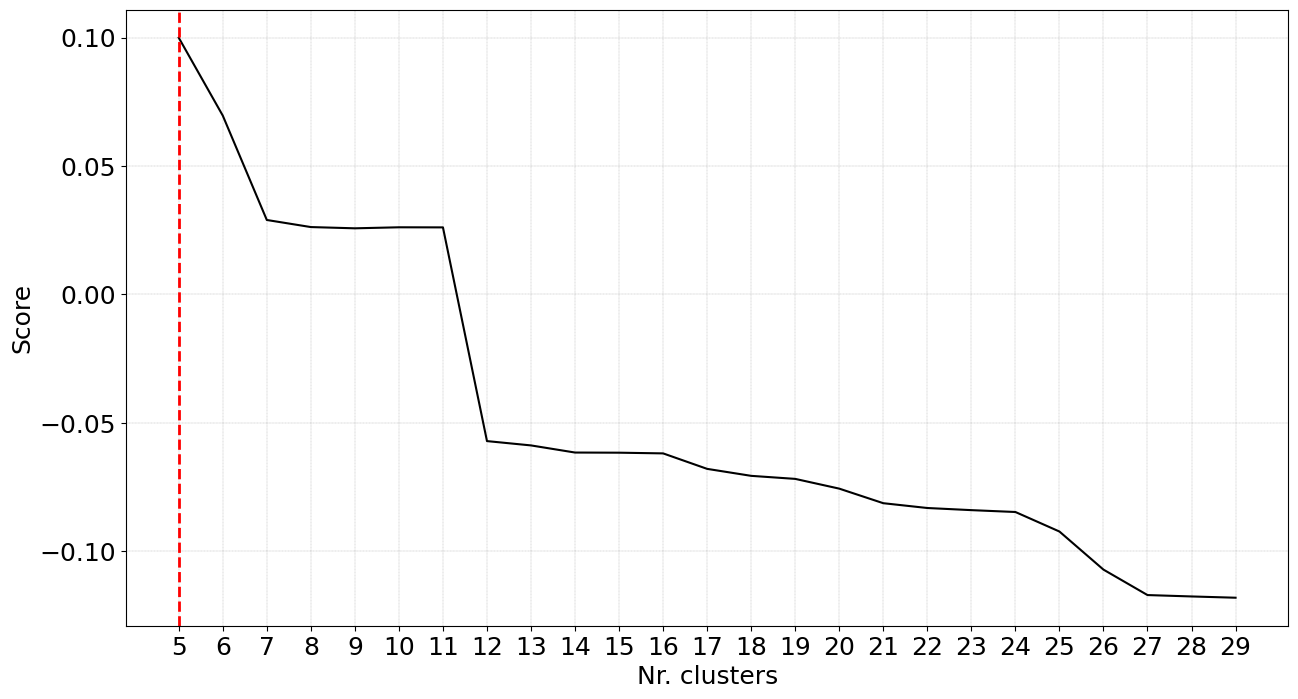

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [ ]:
ce.plot()

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Estimated number of n_clusters: 5, average silhouette_score=-0.464


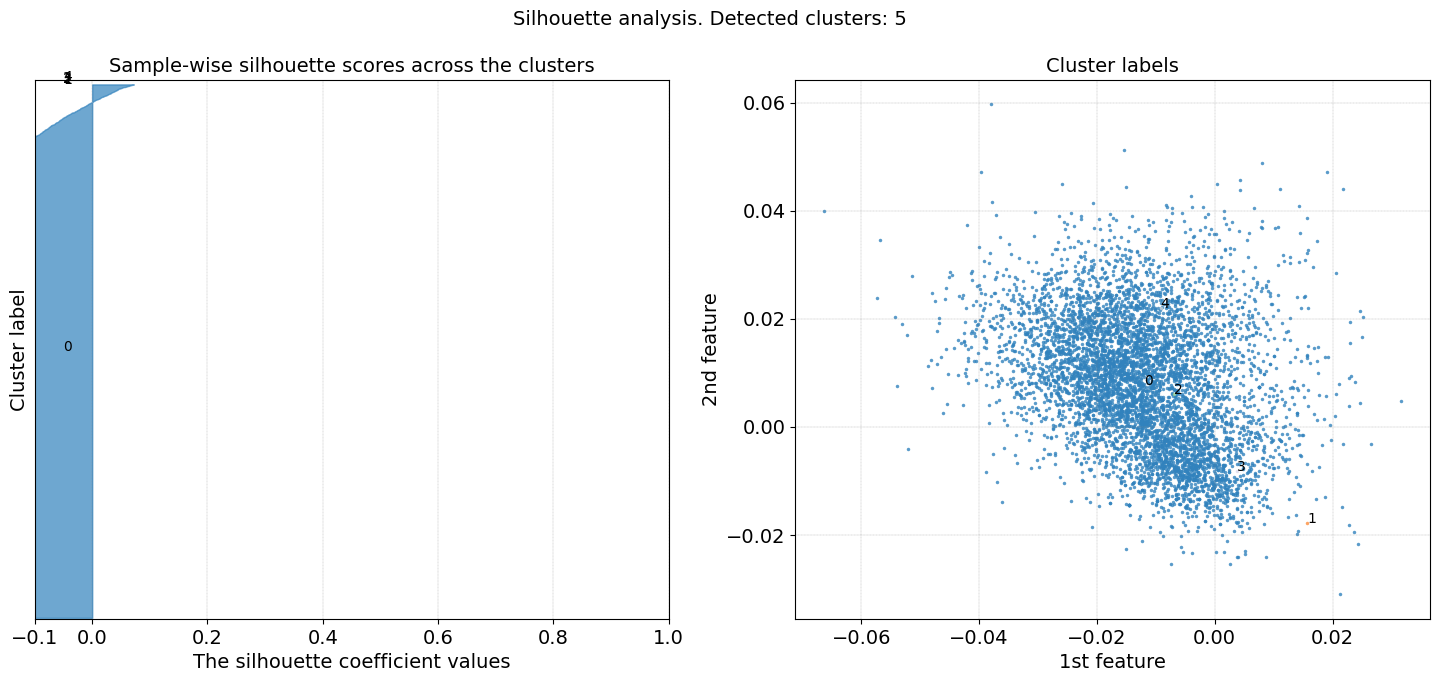

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [ ]:
ce.plot_silhouette(embedding='pca')